In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [63]:
df = pd.read_csv('../Data/data_processed_final.csv')

# for convenience
df.set_index('original_title', inplace=True)
df.drop(columns=['fixed_budget', 'fixed_revenue',
       'budget','revenue'], inplace=True)


Borderline for good/bad movie is: 7.479509992784861


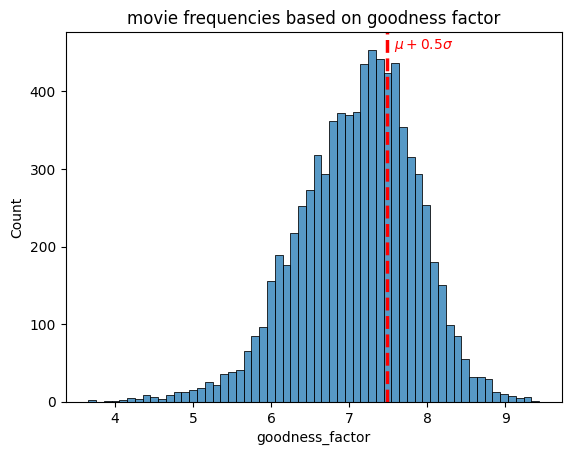

In [64]:
border = df['goodness_factor'].mean() + 0.5*df['goodness_factor'].std() 
print(f'Borderline for good/bad movie is: {border}')


sns.histplot(df['goodness_factor'])
plt.axvline(x=border, color='red', ls='--', 
        lw=2.5)
style = dict(size=10, color='red')
plt.text(x=border+0.1, y=455, s='$\mu+0.5\sigma$', **style)
plt.title('movie frequencies based on goodness factor')
plt.savefig(f'goodness_factor_split.png')
plt.show()


Split movies based on the goodness factor

In [65]:

#Comparison between two groups?
df['is_good'] = df['goodness_factor']>border

#Binary if needed
#df['is_good'] = df['is_good'].replace({True: 1, False: 0})

bad_movies = df.loc[df['goodness_factor']<border]
good_movies = df.loc[df['goodness_factor']>=border]

bad_movies = bad_movies.sort_values(by='goodness_factor')
good_movies = good_movies.sort_values(by='goodness_factor', ascending=False)

worst_movie = bad_movies.head(1)
best_movie = good_movies.head(1)


Reset index for plots

In [66]:
df = df.reset_index()
print(df.head(1))

            original_title    id  runtime                    genres  \
0  The Empire Strikes Back  1891      124  Adventure,Action,Fiction   

   vote_average  vote_count  popularity  year  month  day   fixed_gross  \
0           8.4       14567       26.96  1980      5   20  1.927225e+09   

   gross_factor  pop_factor  freshness_factor  runtime_factor  \
0      9.766115    9.363771               0.0        4.822816   

   goodness_factor  is_good  
0         5.988176    False  


Descriptions of the ..

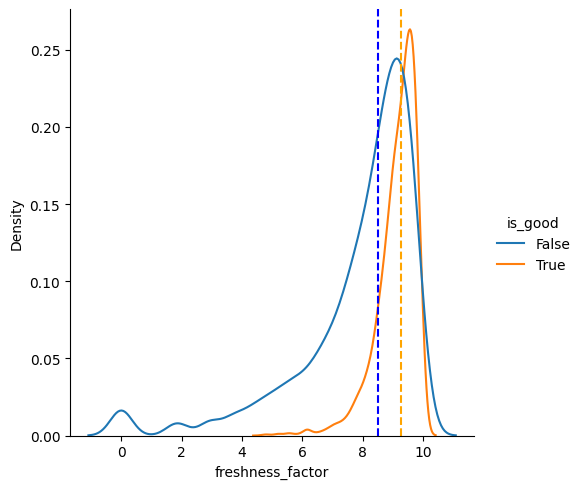

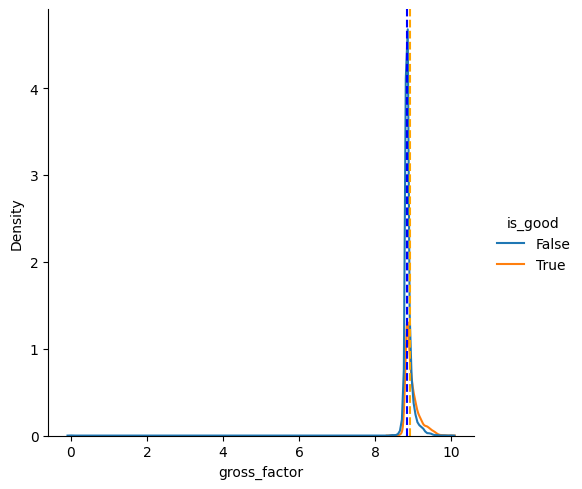

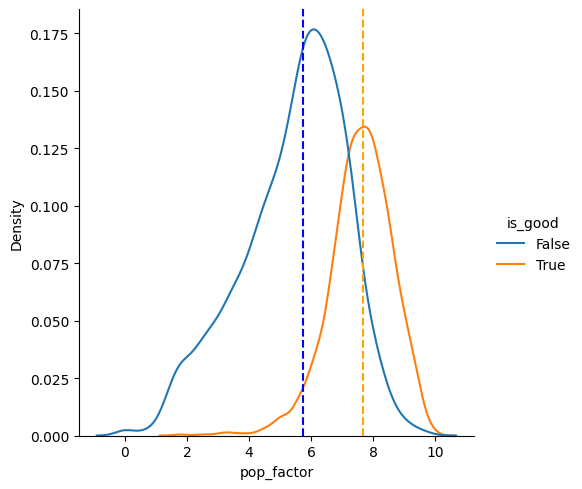

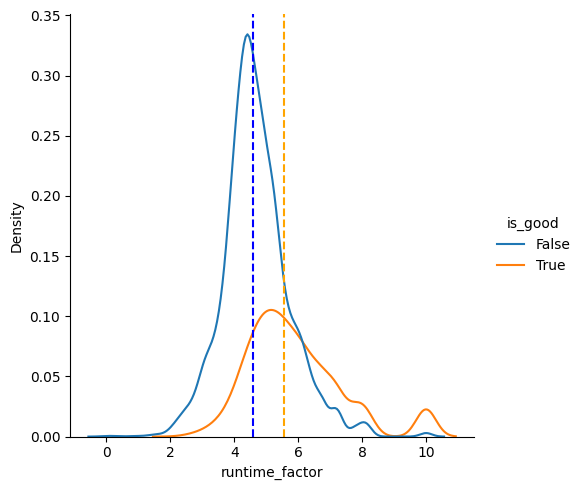

In [67]:
for i in ['freshness_factor', 'gross_factor', 'pop_factor', 'runtime_factor']:
    sns.displot(df, x=i, hue='is_good', kind='kde')
    plt.axvline(x=bad_movies[i].median(), color='blue', ls='--', 
            lw=1.5)
    plt.axvline(x=good_movies[i].median(), color='orange', ls='--', 
            lw=1.5)
    plt.savefig(f'{i}.png')
    plt.show()
    


##print(bad_movies.describe())
#print(good_movies.describe())

Set index back

In [68]:
df = df.set_index('original_title')

Comparison between TMDB's 'popularity' and our goodness factor. Both are already scaled 1-10.

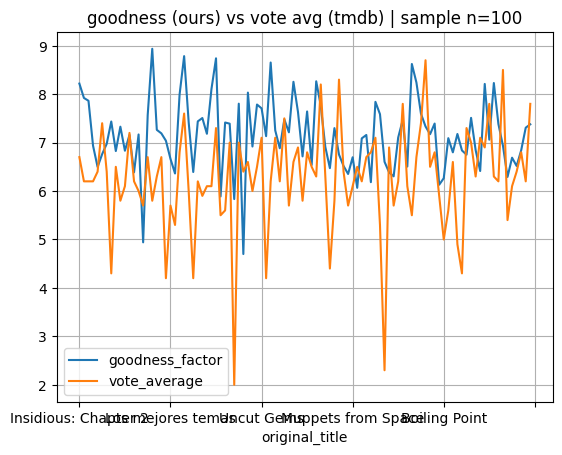

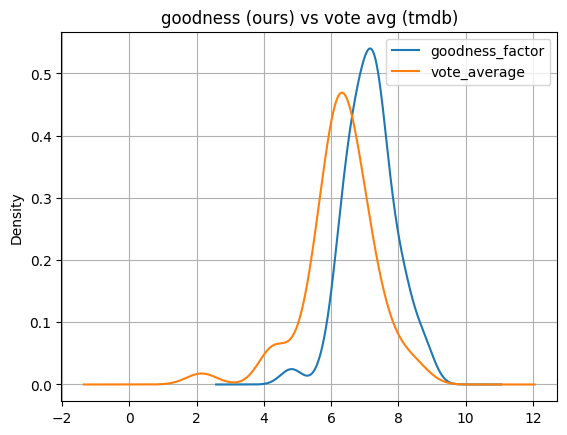

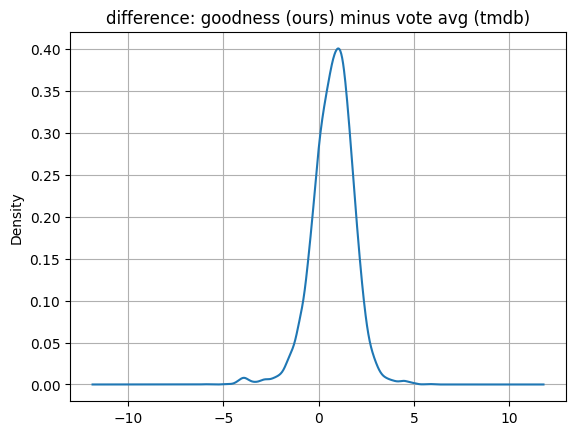

difference (goodness-avg_vote) mean is: 0.7515692322592903
(Overall) Correlation between the two variables:
0.25433208124604


In [69]:
tmpr_data = df[['goodness_factor', 'vote_average']].copy()
n=100
data_sample = tmpr_data.sample(n=n)
data_sample.plot(grid=True, title=f'goodness (ours) vs vote avg (tmdb) | sample n={n}')
plt.savefig(f'goodness_vs_voteavg_sample.png')
plt.show()

data_sample.plot(kind='density',grid=True, title='goodness (ours) vs vote avg (tmdb)')
plt.savefig(f'goodness_vs_voteavg_sample_density.png')
plt.show()


difference = tmpr_data['goodness_factor']-tmpr_data['vote_average']
difference.plot(kind='density' ,grid=True, title='difference: goodness (ours) minus vote avg (tmdb)')
plt.savefig(f'goodness_minus_voteavg_sample.png')
plt.show()

print(f'difference (goodness-avg_vote) mean is: {difference.mean()}')
print(f'(Overall) Correlation between the two variables:\n{tmpr_data.corr().iloc[0,1]}')


#data_sample['goodness_factor'].plot(grid=True, title='goodness (ours)')
#plt.show()
#data_sample['vote_average'].plot(grid=True, title='vote avg (tmdb)')
#plt.show()